# Classifying movie reviews
### Using inbuilt imdb dataset from keras library

## About the dataset
### Total 50000 samples which divided into two sets
> Training set = 25000

> Testing set = 25000

. Each set conatains 50% positive and 50% negative reviews

. The keras prepackaged dataset is alsready preprocessed

### Loading the IMDB dataset

In [4]:
from keras.datasets import imdb

In [6]:
#The argument 10000 means we will only keep top 10K most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 2s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\522817\OneDrive - Cognizant\myWorks\ML\project-dl-book\envs\lib\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\522817\OneDrive - Cognizant\myWorks\ML\project-dl-book\envs\lib\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shape

In [8]:
#Each review is a list of word indices of 10k most frequent occured words dictionary
#Remember here tran and test data contains word indices of most frequest words, nothing else
train_data[0], train_labels[0]

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

In [15]:
#As we are restricting to the 10K, the review lngth never exceeds 10K
count = 0
for reviw in train_data:
    #print(seq)
    print(len(reviw))
    count += 1
    if count > 5:
        break

218
189
141
550
147
43


In [17]:
# The maximum index will be 9999
max([max(rev) for rev in train_data])

9999

In [23]:
review_index = 0 #can choose between 0 to 24999 (train data 25k)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(reverse_word_index.get(i - 3, '?') for i in train_data[review_index])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [24]:
len(decoded_review)

1113

In [25]:
#The review has 1113 words in it but while preprocessign it 10K dictionary we have only 218 words matched hence the vector length of review 0 is 218 length

### Preparing the data
We can not sent the list of integers to model, we have to convert it into tensors. We can get a input shape as (samples, word_indices), a 2D tensor. We can do this by using one of the methods below

1) One hot encoding:-
> We can convert the each list into a 10k length binary vectors and feed them to a dense layer as input layer

2) Padding:-
> By padding each list we can make them all of same legth and then feed them to a Embedding layer as input layer.

Lets use the 1st method

In [33]:
import numpy as np
def vectorize_sequences(sequence, dimension=10000):
    results = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence):
        results[i, sequence] = 1. #sets specific indices of results[i] to 1
    return results

In [51]:
#To understand how the above functions works
seq = [9,3,4,7,8]
dim = 10
results = np.zeros((len(seq), dim))
for i, item in enumerate(seq):
    print(f"{i}: {item}")
    results[i, item] = 1
    print(results[i])
    print()
print(results)

0: 9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

1: 3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]

2: 4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

3: 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

4: 8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [34]:
#Vectorize train and test data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [38]:
len(train_data[0]), X_train[0], len(X_train[0])

(218, array([0., 1., 1., ..., 0., 0., 0.]), 10000)

In [55]:
#COnverting the label data
print(len(train_labels))
print(f"Top 5 review: {train_labels[:5]}")
print(type(train_labels))
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(f"Top 5 review: {y_train[:5]}")
print(type(y_train))

25000
Top 5 review: [1 0 0 1 0]
<class 'numpy.ndarray'>
Top 5 review: [1. 0. 0. 1. 0.]
<class 'numpy.ndarray'>


### Building the Network
Here our input is a vector and output is a scaler. This is the easiest setup ever come across. For this type of setup a stack of dense layer will perform well.

When each item/review is a 10K dimensional vector

There are two key architechture decisions to be made about such a stack of Dense layers
> How many layers to use

> How many hidden units to choose for each layer

Each intermediate unit output can be seen as below: 
> output = relu(dot(W, input) + bias)

For our purpose we will use a below architenchture
> Two intermediate dense layer 

> Each layer with 16 units (the first layer will take 10K data & produce 16 data points)

> Output layer with sigmoid to get probability distribution between 1 and 0

In [60]:
#Model Defination
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#Compiling
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""
#Compiling with configured optimizer or loss or metrics
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])
"""

### Validation Data
In order to monitor the accuracy of the model on the data it has never seen before (during training) we will take away some chunk of the train data as validtion data.

In [63]:
X_val = X_train[:10000]
X_partial_train = X_train[10000:]
y_val = y_train[:10000]
y_partial_train = y_train[10000:]

### Training the model

In [64]:
history = model.fit(X_partial_train, y_partial_train, epochs=20, batch_size=512, validation_data=(X_val,y_val))

Epoch 1/20
30/30 [==============================] - 51s 359ms/step - loss: 0.6007 - accuracy: 0.6884 - val_loss: 0.4153 - val_accuracy: 0.8512
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3554 - accuracy: 0.8967 - val_loss: 0.3435 - val_accuracy: 0.8615
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2496 - accuracy: 0.9216 - val_loss: 0.2878 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1786 - accuracy: 0.9415 - val_loss: 0.2753 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1404 - accuracy: 0.9597 - val_loss: 0.3021 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1188 - accuracy: 0.9657 - val_loss: 0.3055 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0932 - accuracy: 0.9745 - val_loss: 0.3102 - val_accuracy: 0.8838
Epoch 8/20


In [65]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the result

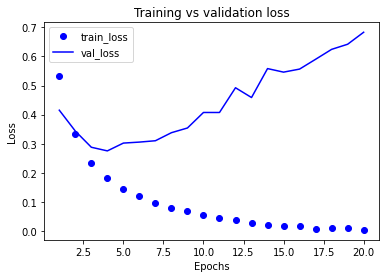

In [70]:
# Train loss vs validation loss
import matplotlib.pyplot as plt
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='train_loss')
plt.plot(epochs, val_loss_values, 'b', label='val_loss')
plt.title("Training vs validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

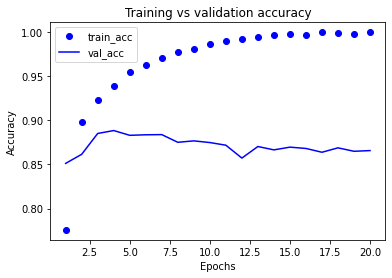

In [71]:
train_acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_acc_values, 'bo', label='train_acc')
plt.plot(epochs, val_acc_values, 'b', label='val_acc')
plt.title("Training vs validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Observations:
After 2nd epoch we are overoptimizing the model on trainig data, hence end up learning represenations that are specific to the training data and dont generalise to the data outside of the training set. Its overfitting.

Two prevent this we can take several measure but now we will retrain the model with less epochs.

In [73]:
#Model Defination

model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#Compiling
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_partial_train, y_partial_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
30/30 [==============================] - 4s 32ms/step - loss: 0.5726 - accuracy: 0.7145
Epoch 2/4
30/30 [==============================] - 1s 33ms/step - loss: 0.2952 - accuracy: 0.9069
Epoch 3/4
30/30 [==============================] - 1s 36ms/step - loss: 0.2128 - accuracy: 0.9340
Epoch 4/4
782/782 [==============================] - 5s 5ms/step - loss: 0.3017 - accuracy: 0.8772


In [74]:
results

[0.30170342326164246, 0.8772000074386597]

This simple niave model achieves an accuracyclose to 88%, with fairly more complex and tuned model we can go easily cloe to 95%.

### Generating predictions on new data

In [75]:
model.predict(X_test)

array([[0.29302353],
       [0.99915874],
       [0.95177627],
       ...,
       [0.11147472],
       [0.20404035],
       [0.54300404]], dtype=float32)

### Further experiments
1) Try using one or three hidden layer and observe the training and validation accuracy

2) Try using layers with more than 16 units e.g 32, 64 units ...

3) Try using `mse` loss function instead of binary_crossentropy

4) Try using `tanh` activation function instaed of relu

#### One hidden layer

In [79]:
#COnverting Train and Val accuracy into a function

def plot_train_val_acc(history_dict):
    train_acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(history_dict['accuracy']) + 1)
    plt.plot(epochs, train_acc_values, 'bo', label='train_acc')
    plt.plot(epochs, val_acc_values, 'b', label='val_acc')
    plt.title("Training vs validation accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Epoch 1/10
30/30 [==============================] - 8s 180ms/step - loss: 0.5740 - accuracy: 0.7182 - val_loss: 0.3885 - val_accuracy: 0.8680
Epoch 2/10
30/30 [==============================] - 1s 30ms/step - loss: 0.3293 - accuracy: 0.9002 - val_loss: 0.3299 - val_accuracy: 0.8790
Epoch 3/10
30/30 [==============================] - 1s 29ms/step - loss: 0.2482 - accuracy: 0.9255 - val_loss: 0.2916 - val_accuracy: 0.8880
Epoch 4/10
30/30 [==============================] - 1s 28ms/step - loss: 0.2072 - accuracy: 0.9377 - val_loss: 0.2833 - val_accuracy: 0.8883
Epoch 5/10
30/30 [==============================] - 1s 28ms/step - loss: 0.1668 - accuracy: 0.9519 - val_loss: 0.2777 - val_accuracy: 0.8896
Epoch 6/10
30/30 [==============================] - 1s 28ms/step - loss: 0.1432 - accuracy: 0.9587 - val_loss: 0.2768 - val_accuracy: 0.8872
Epoch 7/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1241 - accuracy: 0.9668 - val_loss: 0.2826 - val_accuracy: 0.8883
Epoch 8/10
3

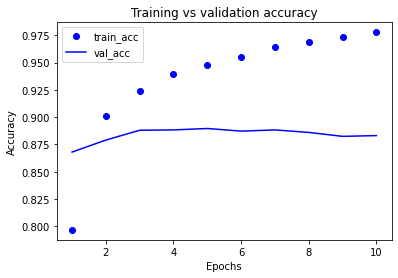

In [83]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#Compiling
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fitting
history=model.fit(X_partial_train, y_partial_train, epochs=10, batch_size=512, validation_data=(X_val,y_val))
history_dict=history.history
plot_train_val_acc(history_dict)

Observations: Validation accuracy is kind of stalling after 2nd epoch. Its almost behaving same as previous archtechture

#### 3 hidden layer

Epoch 1/10
30/30 [==============================] - 9s 213ms/step - loss: 0.6223 - accuracy: 0.6697 - val_loss: 0.4333 - val_accuracy: 0.8276
Epoch 2/10
30/30 [==============================] - 1s 33ms/step - loss: 0.3504 - accuracy: 0.8913 - val_loss: 0.3285 - val_accuracy: 0.8697
Epoch 3/10
30/30 [==============================] - 1s 31ms/step - loss: 0.2273 - accuracy: 0.9277 - val_loss: 0.2844 - val_accuracy: 0.8890
Epoch 4/10
30/30 [==============================] - 1s 33ms/step - loss: 0.1703 - accuracy: 0.9482 - val_loss: 0.2948 - val_accuracy: 0.8850
Epoch 5/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1233 - accuracy: 0.9635 - val_loss: 0.2987 - val_accuracy: 0.8869
Epoch 6/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0986 - accuracy: 0.9731 - val_loss: 0.3160 - val_accuracy: 0.8840
Epoch 7/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0758 - accuracy: 0.9800 - val_loss: 0.3612 - val_accuracy: 0.8734
Epoch 8/10
3

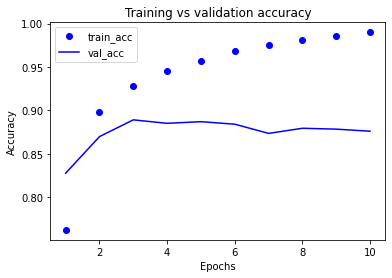

In [84]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#Compiling
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fitting
history=model.fit(X_partial_train, y_partial_train, epochs=10, batch_size=512, validation_data=(X_val,y_val))
history_dict=history.history
plot_train_val_acc(history_dict)

Observations: Although some difference we can see compare to previous one but overall its same. Overfitting.

#### Running Original configuration with higher hidden units 32

Epoch 1/10
30/30 [==============================] - 9s 222ms/step - loss: 0.5809 - accuracy: 0.6873 - val_loss: 0.3508 - val_accuracy: 0.8667
Epoch 2/10
30/30 [==============================] - 1s 38ms/step - loss: 0.2796 - accuracy: 0.9044 - val_loss: 0.2814 - val_accuracy: 0.8900
Epoch 3/10
30/30 [==============================] - 1s 38ms/step - loss: 0.1877 - accuracy: 0.9421 - val_loss: 0.2846 - val_accuracy: 0.8864
Epoch 4/10
30/30 [==============================] - 1s 41ms/step - loss: 0.1402 - accuracy: 0.9563 - val_loss: 0.3050 - val_accuracy: 0.8783
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 0.1145 - accuracy: 0.9643 - val_loss: 0.3906 - val_accuracy: 0.8621
Epoch 6/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0929 - accuracy: 0.9726 - val_loss: 0.3241 - val_accuracy: 0.8838
Epoch 7/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0655 - accuracy: 0.9820 - val_loss: 0.3979 - val_accuracy: 0.8721
Epoch 8/10
3

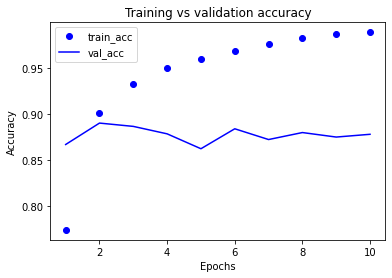

In [85]:
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#Compiling
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fitting
history=model.fit(X_partial_train, y_partial_train, epochs=10, batch_size=512, validation_data=(X_val,y_val))
history_dict=history.history
plot_train_val_acc(history_dict)

Epoch 1/10
469/469 [==============================] - 12s 21ms/step - loss: 0.4590 - accuracy: 0.7873 - val_loss: 0.3295 - val_accuracy: 0.8708
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1923 - accuracy: 0.9285 - val_loss: 0.2911 - val_accuracy: 0.8850
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1462 - accuracy: 0.9458 - val_loss: 0.3181 - val_accuracy: 0.8825
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1191 - accuracy: 0.9563 - val_loss: 0.3756 - val_accuracy: 0.8741
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0934 - accuracy: 0.9677 - val_loss: 0.4227 - val_accuracy: 0.8764
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0736 - accuracy: 0.9740 - val_loss: 0.4637 - val_accuracy: 0.8767
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0521 - accuracy: 0.9827 - val_loss: 0.5422 - val_accuracy: 0.8760
Ep

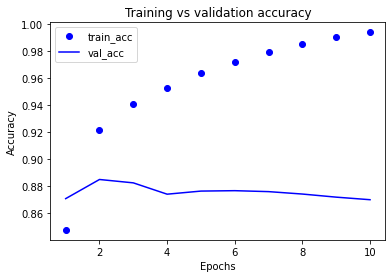

In [86]:
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#Compiling
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Fitting
history=model.fit(X_partial_train, y_partial_train, epochs=10, batch_size=32, validation_data=(X_val,y_val))
history_dict=history.history
plot_train_val_acc(history_dict)

Observations: Accuracy is 1% higher than previous models (87%> 85-86%) but still not much difference.

#### Trying original model with mse as loss function

Epoch 1/10
30/30 [==============================] - 9s 222ms/step - loss: 0.2088 - accuracy: 0.6961 - val_loss: 0.1213 - val_accuracy: 0.8602
Epoch 2/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0922 - accuracy: 0.9067 - val_loss: 0.1009 - val_accuracy: 0.8696
Epoch 3/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0645 - accuracy: 0.9266 - val_loss: 0.0825 - val_accuracy: 0.8927
Epoch 4/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0432 - accuracy: 0.9539 - val_loss: 0.1106 - val_accuracy: 0.8491
Epoch 5/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0363 - accuracy: 0.9612 - val_loss: 0.0900 - val_accuracy: 0.8785
Epoch 6/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0276 - accuracy: 0.9713 - val_loss: 0.0922 - val_accuracy: 0.8753
Epoch 7/10
30/30 [==============================] - 1s 30ms/step - loss: 0.0213 - accuracy: 0.9786 - val_loss: 0.0902 - val_accuracy: 0.8797
Epoch 8/10
3

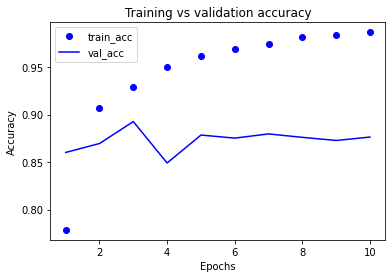

In [87]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#Compiling
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

#Fitting
history=model.fit(X_partial_train, y_partial_train, epochs=10, batch_size=512, validation_data=(X_val,y_val))
history_dict=history.history
plot_train_val_acc(history_dict)

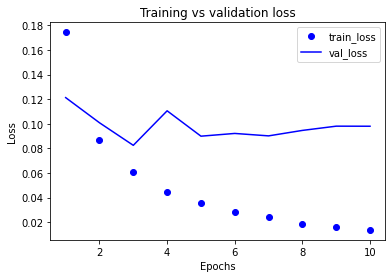

In [89]:
#Plotting loss graph
# Train loss vs validation loss
import matplotlib.pyplot as plt
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='train_loss')
plt.plot(epochs, val_loss_values, 'b', label='val_loss')
plt.title("Training vs validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Observations: Comapring this mse loss plot with original binary_crossentropy we can see the difference.
1)mse has a scale upto 0.18 has max where bce was upto 0.7
2)After 2nd epoch bce loss for val data shootup upto 0.7 but here, the updowns happeneing in val loss at two epoch counts, we can say that mse loss function not giving stable loss plot for this problem.

#### Trying original model with tanh activatiion function

Epoch 1/10
30/30 [==============================] - 10s 232ms/step - loss: 0.1988 - accuracy: 0.6924 - val_loss: 0.1102 - val_accuracy: 0.8598
Epoch 2/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0773 - accuracy: 0.9129 - val_loss: 0.0836 - val_accuracy: 0.8867
Epoch 3/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0471 - accuracy: 0.9450 - val_loss: 0.0836 - val_accuracy: 0.8856
Epoch 4/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0342 - accuracy: 0.9599 - val_loss: 0.0950 - val_accuracy: 0.8772
Epoch 5/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0307 - accuracy: 0.9610 - val_loss: 0.1039 - val_accuracy: 0.8688
Epoch 6/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0195 - accuracy: 0.9769 - val_loss: 0.0995 - val_accuracy: 0.8763
Epoch 7/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0159 - accuracy: 0.9820 - val_loss: 0.1036 - val_accuracy: 0.8745
Epoch 8/10


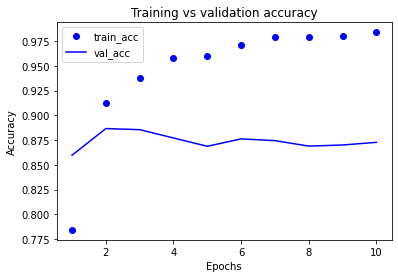

In [90]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

#Compiling
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

#Fitting
history=model.fit(X_partial_train, y_partial_train, epochs=10, batch_size=512, validation_data=(X_val,y_val))
history_dict=history.history
plot_train_val_acc(history_dict)

Observation: WIth tanh rectifier not much difference observed. So final observations is our original model is fairly a good architechture.